<div class="alert alert-block alert-warning">
<b>Task</b> Predict simple classification  on synthetic data by decision trees. Doesn't require strong EDA, just prediction.
Dataset= kyphosis
</div>


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

#### EDA

In [51]:
#посмотрим датасет
df=pd.read_csv('kyphosis.csv')
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [52]:
df.shape

(81, 4)

#### Data preparation

In [53]:
#будем делить через train test split
from sklearn.model_selection import train_test_split

In [54]:
#у нас готовый даатсет, разобьем его на x,y
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [55]:
#разбили на x,y train/ x,y test 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

#### Training

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [57]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predict

In [58]:
predictions=dtree.predict(X_test)

#### Evaluation

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  5]
 [ 4  2]]


              precision    recall  f1-score   support

      absent       0.80      0.76      0.78        21
     present       0.29      0.33      0.31         6

    accuracy                           0.67        27
   macro avg       0.54      0.55      0.54        27
weighted avg       0.69      0.67      0.68        27



**Conslusion:** the prediction is bad. Data isn't balanced. But your task was just to predict, we don't care about results.

In [61]:
#data isn't balanced, and there is not enough data.
y_test.value_counts()

absent     21
present     6
Name: Kyphosis, dtype: int64

#### Draw white-box algorithm for this data

In [67]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [68]:
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [69]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

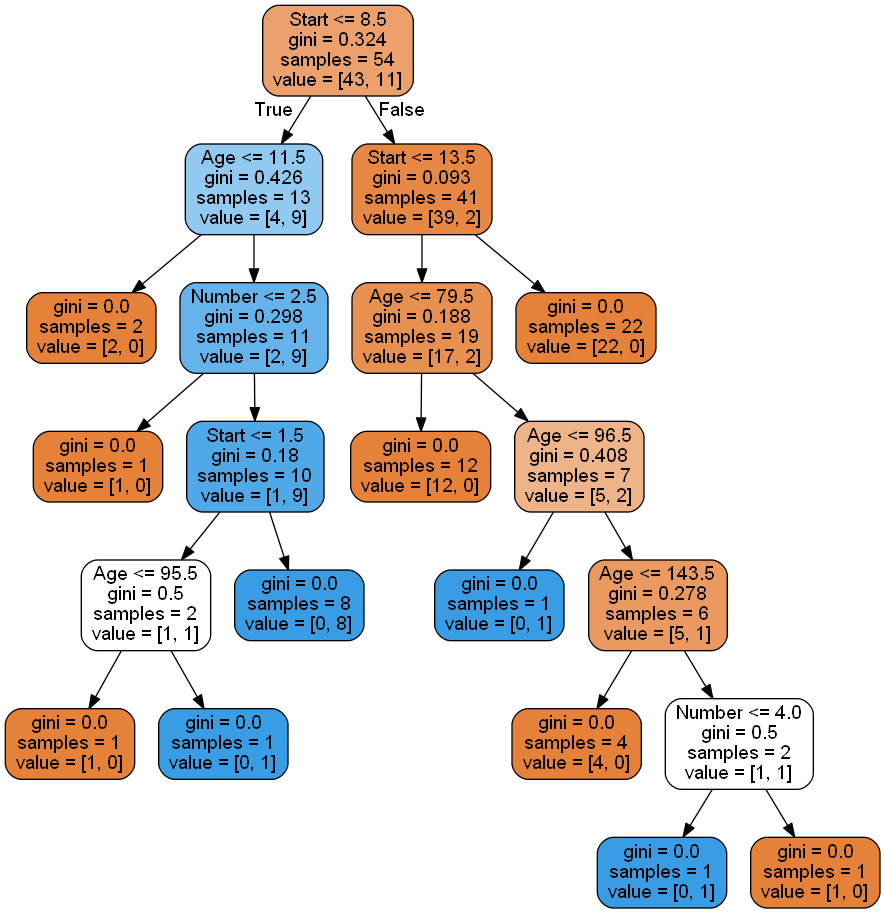

In [79]:
#conda install pydot graphviz
dot_data=StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())